<a href="https://colab.research.google.com/github/Lipkoffsky/ML_pet_projects/blob/main/IrisFlower_sklearn_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## scikit-learn Perceptron 

Загружаем датасет Ирисы Фишера из библиотеки scikit-learn
Для визуализации возьмем в матрицу признаков **X** только два признака: длину и ширину лепестка

Целевые значения запишем в вектор **y**



In [18]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Берем только длину и ширину лепестка
y = iris.target # целевые значения - класс цветка

Разделим датасет на тренировочную и тестовую выборки с помощью фукнции train_test_split из библиотеки sklearn

Размер тестовой выборки - 30%

Размер тренировочной - 70%

In [19]:
#Разделяем наш датасет на тестовую и тренировочную части
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=0)

# Стандартизация

Стандартизируем данные с помощью класса StandardScaler из модуля preprocessing библиотеки scikit-learn

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # вычисляем эмпирическое среднее и стандартное отклонение
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Обучение

In [25]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# Прогнозирование

In [26]:
y_pred = ppn.predict(X_test_std)
print('Число ошибочно классифицированных образцов: %d'%(y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 5


# Оценка правильности прогноза

In [27]:
from sklearn.metrics import accuracy_score
print('Точность: %.2f' % accuracy_score(y_test, y_pred))

Точность: 0.89


# Построение графика

Вспомогательная функция для отображения зон решения

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    '''Отобразить границы решений для двумерных наборов данных'''

    # Настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'purple', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution)
                          ,np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

        # выделить тестовые образы
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black'
                        , alpha=1.0, linewidths=1, marker='o'
                        , s=55, label='тестовый набор')
    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1]
                   ,alpha=0.8, c=cmap(idx)
                   ,marker=markers[idx], label=cl)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


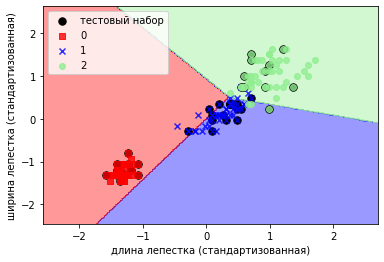

In [53]:
import matplotlib.pyplot as plt

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std
                      ,classifier=ppn, test_idx=range(105, 150))
plt.xlabel('длина лепестка (стандартизованная)')
plt.ylabel('ширина лепестка (стандартизованная)')
plt.legend(loc='upper left')
plt.show()